In [1]:
from cosmoslik import *

In [2]:
chain=load_chain("LBAOSNnonpar.chain")

In [3]:
print(chain)

     # of chains:  2
      # of steps:  3074
    total weight:  9991.00
      acceptance:  0.308
              H0:       73.78 ± 1.639
             Hz1:       80.56 ± 2.113
             Hz2:         101 ± 2.872
             Hz3:       116.5 ± 6.035
             Hz4:       197.9 ± 40.77
        alphaBAO:      0.2953 ± 0.004024
         alphaSN:      0.3625 ± 0.003138


/nfs/home/mjoy/myVE/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


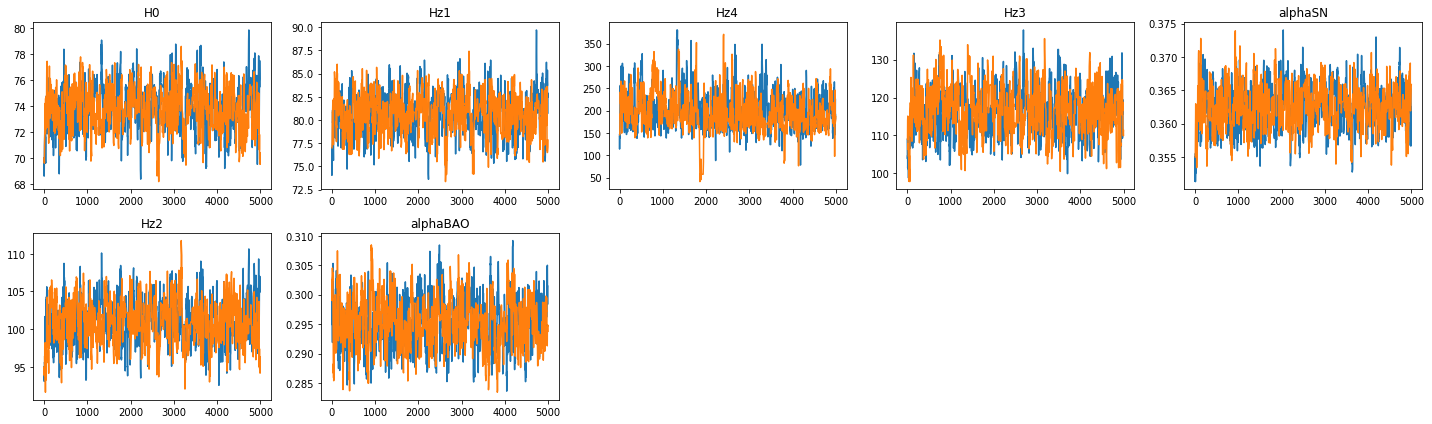

In [5]:
chain.plot()

In [6]:
chain=chain.burnin(1000).join()

In [7]:
#import numpy as np
chain['rs']=2.998e05/(chain['H0']*chain['alphaBAO']*100)
#mean=np.sum(chain['rs'])/len(chain['rs'])
#error=np.sqrt(np.sum((chain['rs']-mean)**2)/len(chain['rs']))
#print(mean,error)
#mean2=chain.mean(chain['rs'])

In [8]:
print(chain)

      # of steps:  2176
    total weight:  7993.00
      acceptance:  0.272
              H0:       73.82 ± 1.664
             Hz1:       80.61 ± 2.142
             Hz2:       101.1 ± 2.858
             Hz3:       116.6 ± 5.923
             Hz4:       194.9 ± 40.05
        alphaBAO:      0.2953 ± 0.003908
         alphaSN:      0.3626 ± 0.003059
              rs:       137.6 ± 3.609


In [10]:
import numpy as np
error=np.sqrt(.26**2+3.609**2)
diff=(147.09-137.6)/error
print(error,diff)

3.6183533547734115 2.6227399785265835


In [8]:
H=np.sum(chain['H0'])/len(chain['H0'])
print(chain.mean('H0'))
print(H)

73.62810973689992
73.64688802162287


In [8]:
chain.savecov("cov_LBAOSN_nonpar.txt")

In [11]:
rs=2.998e05/73.62/29.52
print(rs)

137.9492876700025


In [7]:
1.176*.002808+1.176**2+.002808**2

1.3862860928639997

In [8]:
1.176*.002808+1.176*.2952+.002808*73.62

0.557182368

In [12]:
maxval=2.998e05/(73.62-1.176)/((.2952-.002808)*100)
minval=2.998e05/(73.62+1.176)/((.2952+.002808)*100)
print(maxval,minval)
print(rs-maxval,rs-minval)

141.5349581058563 134.5009440864426
-3.585670435853814 3.448343583559904


In [15]:
rserror=maxval-rs
print(rs,rserror)

137.9492876700025 3.585670435853814


In [16]:
chain.params

<bound method Chains.params of <cosmoslik.chains.Chains object at 0x7f8a3c575368>
     # of chains:  2
      # of steps:  2788
    total weight:  9997.00
      acceptance:  0.279
              H0:       73.62 ± 1.176
             Hz1:       80.44 ± 1.541
             Hz2:       100.7 ± 2.007
             Hz3:       116.3 ± 4.348
             Hz4:       185.5 ± 30.41
        alphaBAO:      0.2952 ± 0.002808
         alphaSN:      0.3626 ± 0.002402>

In [17]:
chain['H0'][5]

TypeError: list indices must be integers, not str

In [18]:
chain['H0']

TypeError: list indices must be integers, not str

In [6]:
chain=chain.join()
print(chain)

      # of steps:  1000
    total weight:  4278.00
      acceptance:  0.234
              H0:       73.43 ± 1.296
             Hz1:       80.56 ± 1.804
             Hz2:       100.8 ± 2.362
             Hz3:       117.1 ± 4.715
             Hz4:       150.1 ± 56.46
        alphaBAO:      0.2961 ± 0.00319
         alphaSN:      0.3636 ± 0.002869
              rs:         137 ± 6.699


In [10]:
chain['rp']=2.998e05/(chain['H0']*chain['alphaBAO']*100)

In [11]:
import numpy as np

In [12]:
print(np.sum(chain['rp'])/len(chain['rp']))

138.25139821172192


[0.91096316 0.61898528 0.36808126 0.30529433 0.92356166]


/nfs/home/mjoy/myVE/lib/python3.4/site-packages/ipykernel_launcher.py:30: RuntimeWarning: overflow encountered in exp


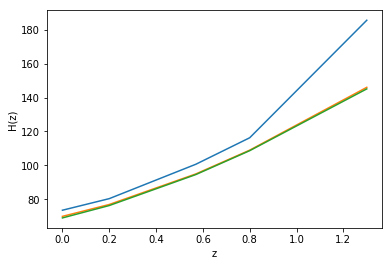

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import scipy as sp
from scipy.integrate import quad
from scipy.interpolate import *
z=np.array([0,.2,.57,.8,1.3])
H=np.array([73.62,80.44,100.7,116.3,185.5])
Hguess=np.array([70,77,95,109,146])
plt.plot(z,H)
plt.plot(z,Hguess)
plt.xlabel('z')
plt.ylabel('H(z)')
i=0
Hlcdm=np.array([])
alphaBAO=.2952
rfid=147
k=8.62*10**(-5) #Boltzmann constant (eV/K)
hp=4.136*10**(-15) #Planck constant (eV*s)
Tg=2.73 #CMB photon temperature (K)
c=2.998e8 #speed of light (m/s)
mn=0.02/(c**2) #neutrino mass (eV/c^2)
L=mn*c**2/(k*Tg*(4/11)**(1/3))
h=0.72 #hubble
p0=1.88*h**2*10**(-26)*1.783*10**36
wm=0.3052
wr=5e-05
def wn(z):
    def n_integrand(x,z):
        return x**2*np.sqrt((1/(1+z))**2+x**2)/(np.exp(x*L)+1)
    n=quad(n_integrand,0,np.inf,args=(z))
    return n[0]*((3*c**5*mn**4)*(1/(1+z))**(-4)*p0**(-1)*(np.pi)**(-2)*hp**(-3))
zgrid=np.arange(.01,1,.01)
wngrid=[]
for i in range(len(zgrid)):
    wngrid=np.append(wngrid,wn(zgrid[i]))
wn_cs=sp.interpolate.CubicSpline(zgrid,wngrid)
i=0
while i<5:
    a=1/(1+z[i])
    H=c*(alphaBAO*100)**(-1)*rfid**(-1)*np.sqrt(wm*a**(-3)+(1-wm)+wr*a**(-4)+wn_cs(z[i]))/1000
    Hlcdm=np.append(Hlcdm,H)
    i=i+1
plt.plot(z,Hlcdm)
print(Hguess-Hlcdm)